# Exploratory Data Analysis - House Prices

Here, in this notebook, we execute an Exploratory Data Analysis (EDA) over ["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset.

In [1]:
# modules
import math
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Auxiliary functions
def check_data(data):
    cols = data.columns
    print('Total cols::', len(cols))
    num_cols = data._get_numeric_data().columns
    print('Numeric cols::', len(num_cols))
    cat_cols = list(set(cols) - set(num_cols))
    print('Categorical cols::', len(cat_cols))

Let's take an inital look on **train** and **test** data.

In [3]:
train_data = pd.read_csv('../data/raw/train.csv')
print('train.csv::', train_data.shape)
test_data = pd.read_csv('../data/raw/test.csv')
print('test.csv::', test_data.shape)
train_data.head(3)

train.csv:: (1460, 81)
test.csv:: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# Checking the data type
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
print('---Train')
check_data(train_data)
print('---Test')
check_data(test_data)

---Train
Total cols:: 81
Numeric cols:: 38
Categorical cols:: 43
---Test
Total cols:: 80
Numeric cols:: 37
Categorical cols:: 43


In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Let's remove the "Id" column** because it's irrelevant to predict SalesPrice.

In [7]:
train_data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

## Missing values

Before to proceed, let's check if train_data has issues with missing values. The missingno module is a good tool to visualize missing values.

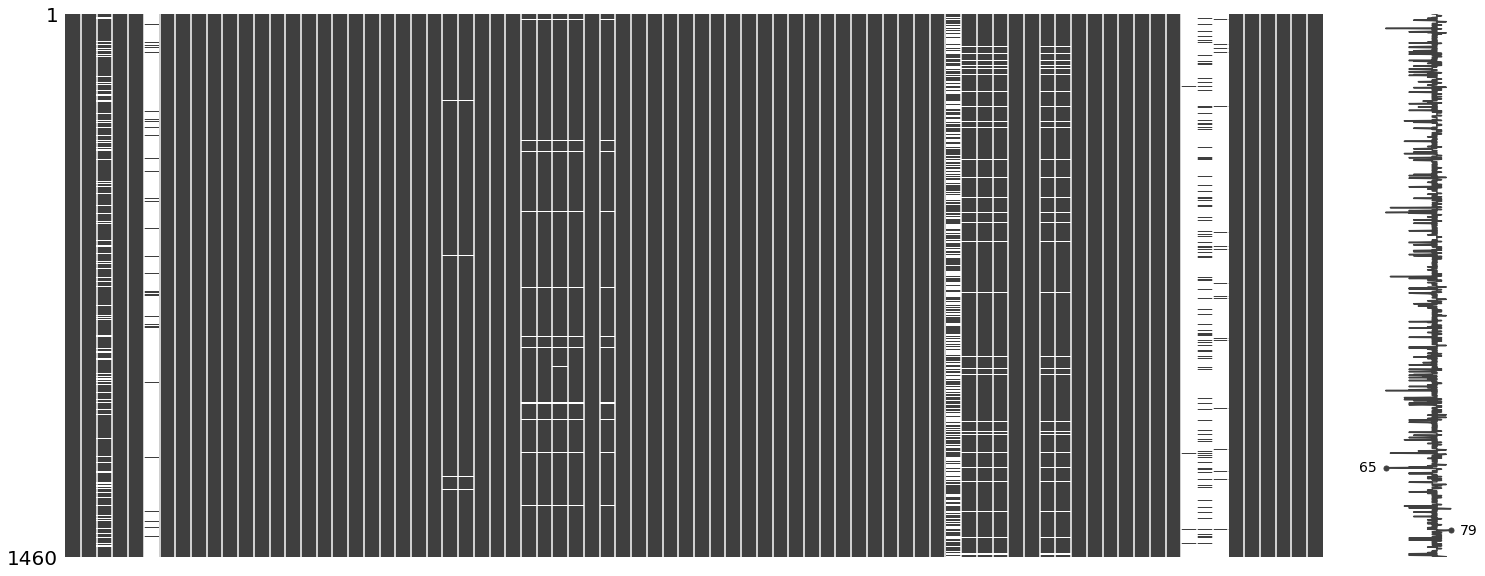

In [8]:
msno.matrix(train_data)

It seems that some columns have a lot of missing values. Let's count how many columns are being affected.

In [9]:
columns_with_miss = train_data.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print('Columns with missing values::', len(columns_with_miss))
columns_with_miss.sort_values(ascending=False)

Columns with missing values:: 19


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

From 80 columns, 19 have missing values. Yet, it's interesting to note that 4 of them almost have no values (PoolQC, MiscFeature, Alley and Fence) and it will be candidates to exclusion.

**TODO**: **Exclude PoolQC, MiscFeature, Alley, Fence, and FireplaceQu columns**.
- PoolQC: Pool quality
- MiscFeature: Miscellaneous feature not covered in other categories
- Alley: Type of alley access to property
- Fence: Fence quality

FireplaceQu (690) and LotFrontage (259) columns need to be investigated before taking any action.

**TODO**: Analyze if FireplaceQu and LotFrontage have useful information.
- FireplaceQu: Fireplace quality
- LotFrontage: Linear feet of street connected to property

In [10]:
# Removing columns
train_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)
test_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

About FireplaceQu, it's necessary to consider that missing values hold information too. Here, NaN means No Fireplace. Maybe, it's unwise to remove this column.
- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace

To explore the relation between FireplaceQu and SalePrice, let's encode categorical values to numeric. NA value will be 0, Poor will be 1, and so on.

In [11]:
train_data['FireplaceQu'].fillna(0, inplace=True)
train_data['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
test_data['FireplaceQu'].fillna(0, inplace=True)
test_data['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

With a barplot, we can note an increase in SalePrice when FireplaceQu is higher. Besides that, houses with Excellent fireplaces vary prices a lot. **Let's keep FireplaceQu**.

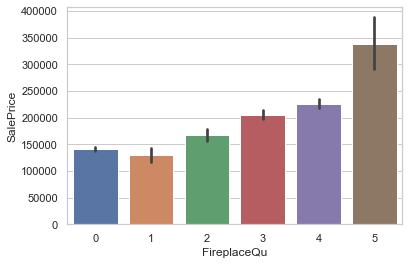

In [12]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=train_data)

About LotFrontage, there are 17% of missing values in train_data and 15% in test_data. Moreover, LotFrontage has a good correlation with SalePrice. By now, **let's keep LotFrontage.**

In [13]:
print('LotFrontage::')
print("{:.2%} missing values in train_data.".format(train_data['LotFrontage'].isna().sum()/train_data.shape[0]))
print("{:.2%} missing values in test_data.".format(test_data['LotFrontage'].isna().sum()/train_data.shape[0]))
train_data[['LotFrontage', 'SalePrice']].corr()

LotFrontage::
17.74% missing values in train_data.
15.55% missing values in test_data.


,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


## Categorical variables
Like FireplaceQu, several columns follow the same system to measure some aspect of the house. So let's perform same encoding of FireplaceQu.

ExterQual: Evaluates the quality of the material on the exterior 
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor

BsmtQual: Evaluates the height of the basement
- Ex	Excellent (100+ inches)	
- Gd	Good (90-99 inches)
- TA	Typical (80-89 inches)
- Fa	Fair (70-79 inches)
- Po	Poor (<70 inches
- NA	No Basement

BsmtCond: Evaluates the general condition of the basement
- Ex	Excellent
- Gd	Good
- TA	Typical - slight dampness allowed
- Fa	Fair - dampness or some cracking or settling
- Po	Poor - Severe cracking, settling, or wetness
- NA	No Basement
       
HeatingQC: Heating quality and condition
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor

KitchenQual: Kitchen quality
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor

GarageQual: Garage quality
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor
- NA	No Garage

GarageCond: Garage condition
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor
- NA	No Garage

In [14]:
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
print('Categorical columns::', len(cat_cols))
print(cat_cols)

Categorical columns:: 38
['SaleType', 'BsmtFinType2', 'MSZoning', 'Street', 'LandContour', 'KitchenQual', 'BsmtQual', 'Heating', 'RoofStyle', 'PavedDrive', 'Exterior1st', 'SaleCondition', 'GarageQual', 'HouseStyle', 'Foundation', 'GarageCond', 'GarageFinish', 'Utilities', 'LotConfig', 'BsmtCond', 'LandSlope', 'RoofMatl', 'ExterQual', 'ExterCond', 'CentralAir', 'Neighborhood', 'BldgType', 'LotShape', 'BsmtFinType1', 'HeatingQC', 'Functional', 'MasVnrType', 'Condition2', 'GarageType', 'Exterior2nd', 'Electrical', 'BsmtExposure', 'Condition1']


In [15]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    train_data[col].fillna(0, inplace=True)
    train_data[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
    test_data[col].fillna(0, inplace=True)
    test_data[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

Let's plot to undestand if this columns have useful information.

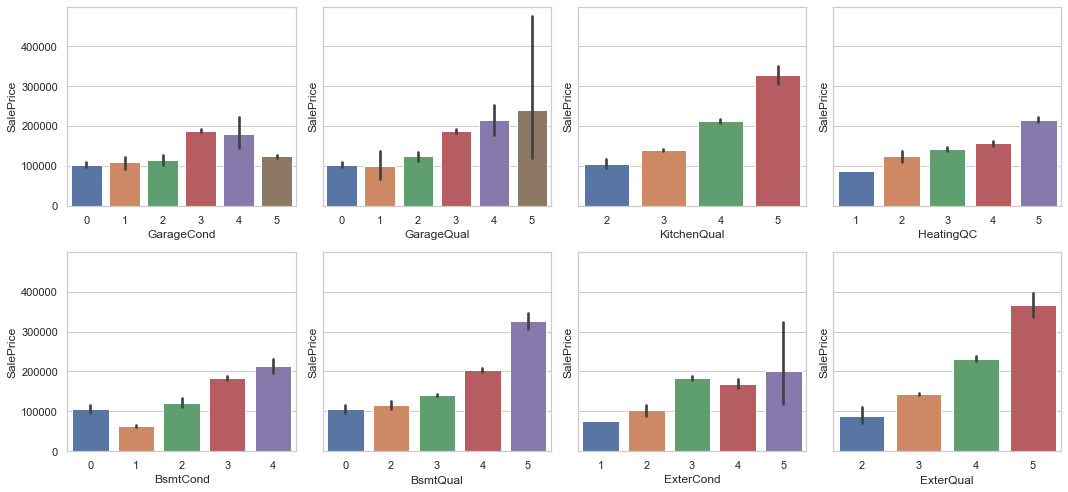

In [16]:
f, axes = plt.subplots(2, 4, figsize=(15, 7), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SalePrice", data=train_data, ax=axes[r][c])

plt.tight_layout()
plt.show()

As you can see, of course, better quality or condition of an aspect increases a house price. Let's check how our data look like now.

In [17]:
print('---Train')
check_data(train_data)
print('---Test')
check_data(test_data)

---Train
Total cols:: 76
Numeric cols:: 46
Categorical cols:: 30
---Test
Total cols:: 75
Numeric cols:: 45
Categorical cols:: 30


In [18]:
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
print('Categorical columns::', len(cat_cols))
print(cat_cols)

Categorical columns:: 30
['SaleType', 'BsmtFinType2', 'MSZoning', 'Street', 'LandContour', 'Heating', 'RoofStyle', 'PavedDrive', 'Exterior1st', 'SaleCondition', 'HouseStyle', 'Foundation', 'GarageFinish', 'Utilities', 'LotConfig', 'CentralAir', 'LandSlope', 'RoofMatl', 'Neighborhood', 'BldgType', 'LotShape', 'BsmtFinType1', 'Functional', 'MasVnrType', 'Condition2', 'GarageType', 'Exterior2nd', 'Electrical', 'BsmtExposure', 'Condition1']


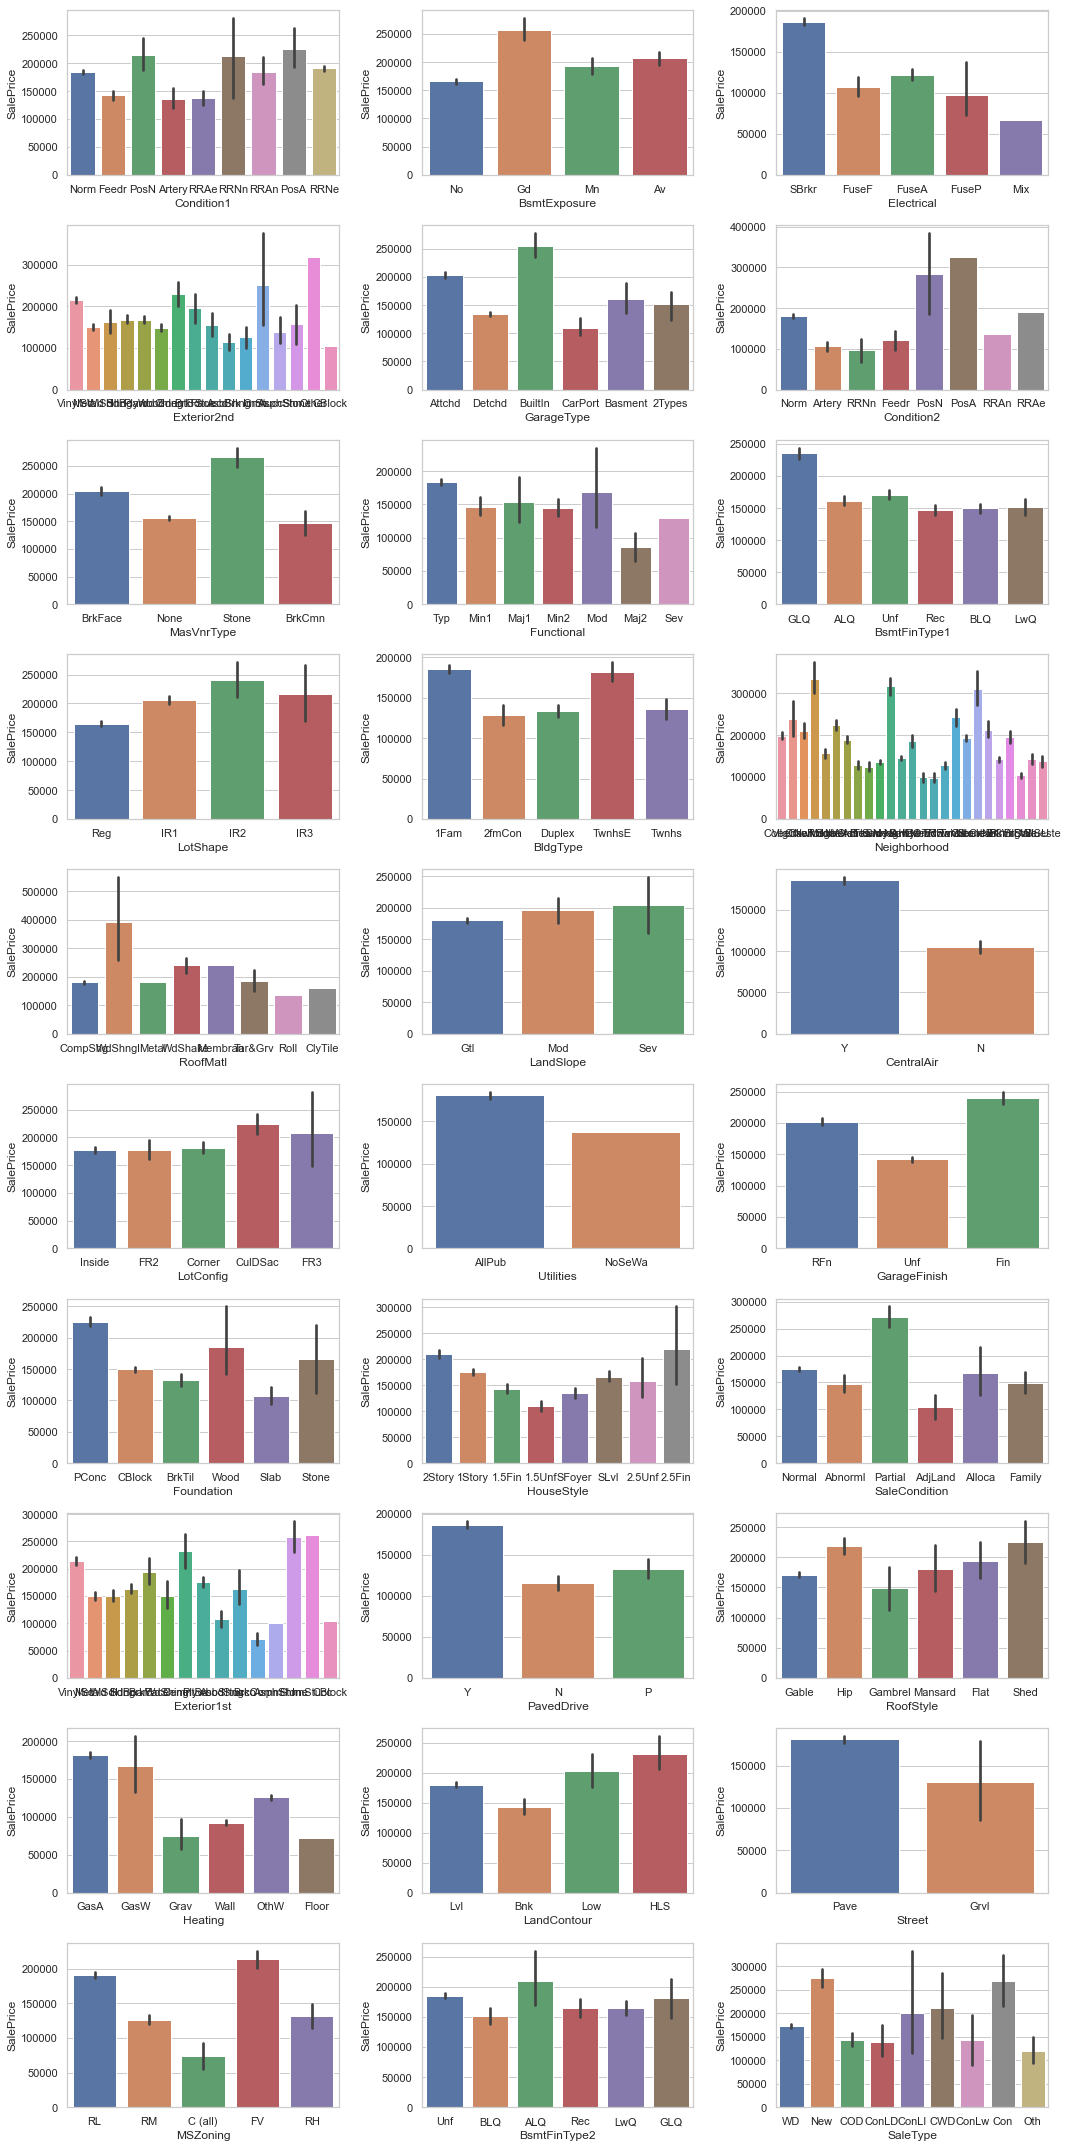

In [19]:
ncols = 3
nrows = math.ceil(len(cat_cols) / ncols)
f, axes = plt.subplots(nrows, ncols, figsize=(15, 30))

for r in range(0, nrows):
    for c in range(0, ncols):
        if not cat_cols:
            continue
        sns.barplot(x=cat_cols.pop(), y="SalePrice", data=train_data, ax=axes[r][c])

plt.tight_layout()
plt.show() 